# import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from glob import glob

In [71]:
def show_log(dir_name):
    log_file_path = './log/' + dir_name + '/training.log'
    log = pd.read_csv(log_file_path)
    log.plot(x='epoch')
    return log

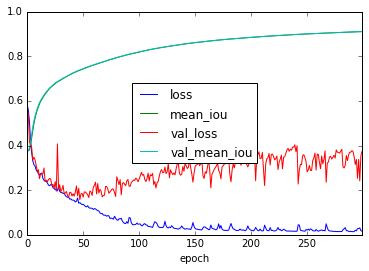

In [72]:
log1 = show_log('2018_0721_1532')

In [73]:
np.min(log1.val_loss)

0.1576288288831711

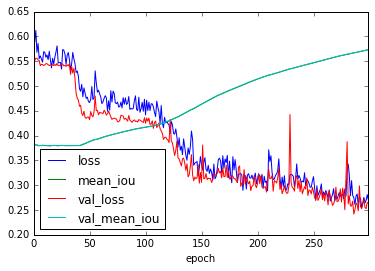

In [63]:
show_log('2018_0723_1717')

0.128431546743624

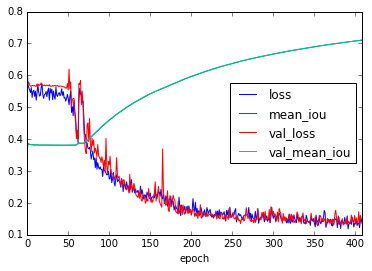

In [179]:
log2 = show_log('2018_0728_2026')
np.min(log2.val_loss)
# unet_256

0.16008224118031694

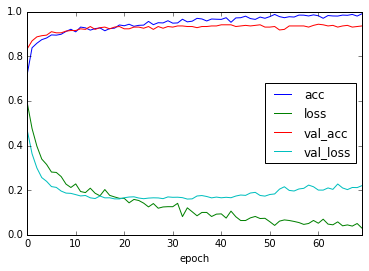

In [159]:
log3 = show_log('2018_0728_1659')
np.min(log3.val_loss)

0.07965438623354798

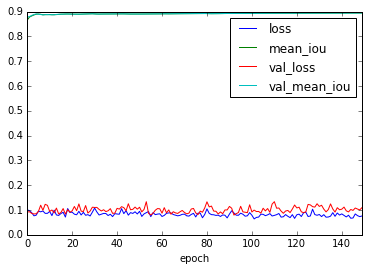

In [160]:
log3 = show_log('2018_0727_2358')
np.min(log3.val_loss)

0.09741833055233894

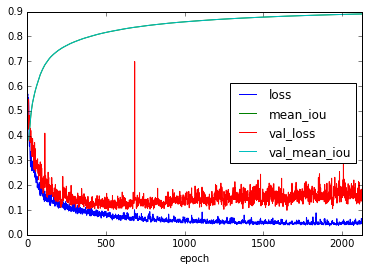

In [139]:
log3 = show_log('2018_0727_1808')
np.min(log3.val_loss)

0.1815815817152933

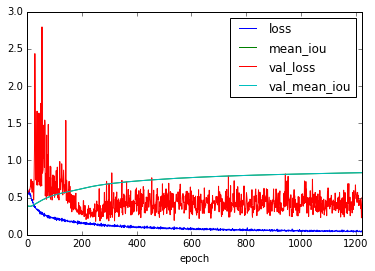

In [180]:
log3 = show_log('2018_0729_0020')
np.min(log3.val_loss)

In [ ]:
log.plot(x='epoch')